In [1]:
# %load_ext autoreload
# %autoreload 3

In [2]:
import torch
import dynapsetorch
from dynapsetorch.model import DPIneuron

/home/ferqui/anaconda3/envs/dynapse/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Calibrate data from dynapse

In [3]:
import numpy as np
KAPPA_N = 0.75
KAPPA_P = 0.66
UT = 25. * 1e-3
I0 = 0.5 * 1e-13
KAPPA = (KAPPA_N+KAPPA_P)/2
KAPPA_2 = KAPPA**2.0
KAPPA_prime = KAPPA_2 / (KAPPA + 1.0)

V2I = lambda x: I0*np.exp(x*KAPPA/UT)
I2V = lambda x: (UT / KAPPA) * np.log(x / I0)

In [4]:
import os
import fnmatch
import pandas as pd
# for i in range(len(fnmatch.filter(os.listdir('taucalib'), '*.*'))):
df = pd.read_csv(f'trainingRecord/TEK0000.CSV', header=None)
dt = float(df[1][1])
N = int(float(df[1][0]))
data = df[4].to_numpy() - df[4].to_numpy()[:10].mean()

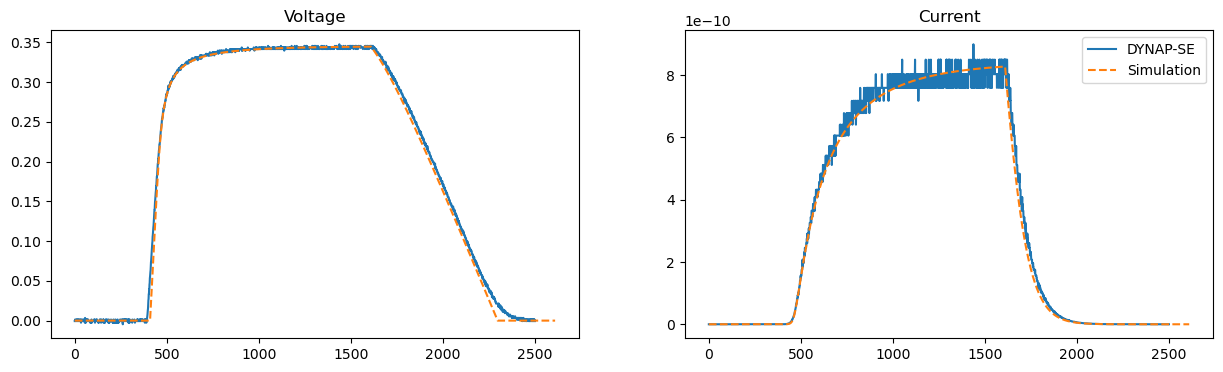

In [5]:
import matplotlib.pyplot as plt

neuron = DPIneuron(1, 1, Idc=0, Itau_mem=4.2e-12, Igain_mem=50e-12, Iampa_w0=1000e-12, alpha=1.06e9, dt=dt)
torch.nn.init.constant_(neuron.W_ampa.data, 1.0)
loss = 0
totalI = []
totalV = []
totalAmpa = []
neuron.reset()
for t in range(410):
    out = neuron(torch.zeros(1, 1))
    totalI.append(neuron.getImem()[0,:].detach().numpy())
    totalV.append(neuron.getVmem()[0,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())

neuron.Idc.data = torch.tensor(40e-12)
for t in range(1200):
    out = neuron(torch.zeros(1, 1))
    totalI.append(neuron.getImem()[0,:].detach().numpy())
    totalV.append(neuron.getVmem()[0,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())

neuron.Idc.data = torch.tensor(0)
for t in range(1000):
    out = neuron(torch.zeros(1, 1))
    totalI.append(neuron.getImem()[0,:].detach().numpy())
    totalV.append(neuron.getVmem()[0,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axs[0].plot(data, label='DYNAP-SE')
axs[0].plot(totalV, '--', label='Simulation')
axs[0].set_title('Voltage')

axs[1].plot(V2I(data), label='DYNAP-SE')
axs[1].plot(totalI, '--', label='Simulation')
axs[1].set_title('Current')

plt.legend()
plt.show()

In [6]:
import os
import fnmatch
import pandas as pd
# for i in range(len(fnmatch.filter(os.listdir('taucalib'), '*.*'))):
df = pd.read_csv(f'trainingRecord/TEK0002.CSV', header=None)
dt = float(df[1][1])
N = int(float(df[1][0]))
data = df[4].to_numpy() - df[4].to_numpy()[:10].mean()

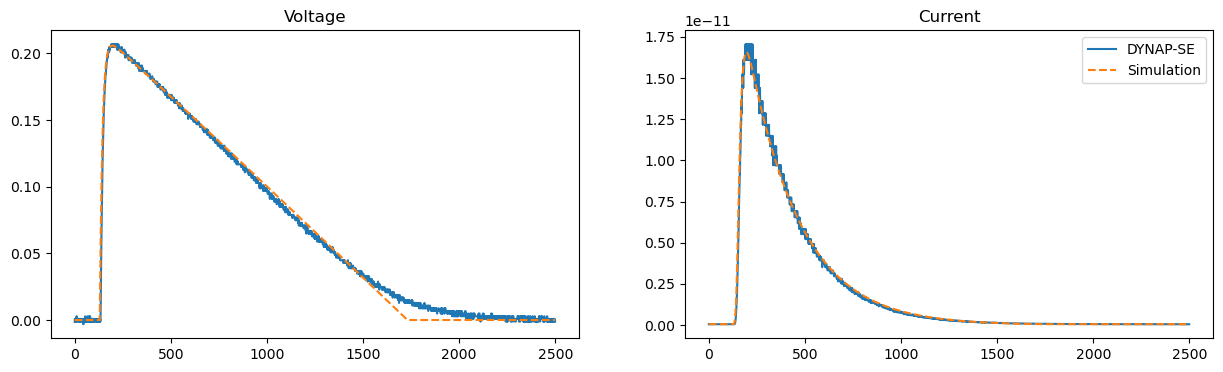

In [7]:
import matplotlib.pyplot as plt

neuron = DPIneuron(1, 1, Idc=0, Itau_mem=4.2e-12, Igain_mem=50e-12, alpha=1.06e9, Iampa_g=70e-12, Iampa_tau=50e-12, Iampa_w0=53000e-12, dt=dt)
torch.nn.init.constant_(neuron.W_ampa.data, 1.0)
loss = 0
totalI = []
totalV = []
totalAmpa = []
neuron.reset()
for t in range(2500):
    if t==130:
        out = neuron(torch.ones(1, 1))
    else:
        out = neuron(torch.zeros(1, 1))
    totalI.append(neuron.getImem()[0,:].detach().numpy())
    totalV.append(neuron.getVmem()[0,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axs[0].plot(data, label='DYNAP-SE')
axs[0].plot(totalV, '--', label='Simulation')
axs[0].set_title('Voltage')

axs[1].plot(V2I(data), label='DYNAP-SE')
axs[1].plot(totalI, '--', label='Simulation')
axs[1].set_title('Current')

plt.legend()
plt.show()

In [8]:
import os
import fnmatch
import pandas as pd
# for i in range(len(fnmatch.filter(os.listdir('taucalib'), '*.*'))):
df = pd.read_csv(f'trainingRecord/TEK0001.CSV', header=None)
dt = float(df[1][1])
N = int(float(df[1][0]))
data = df[4].to_numpy() - df[4].to_numpy()[:10].mean()

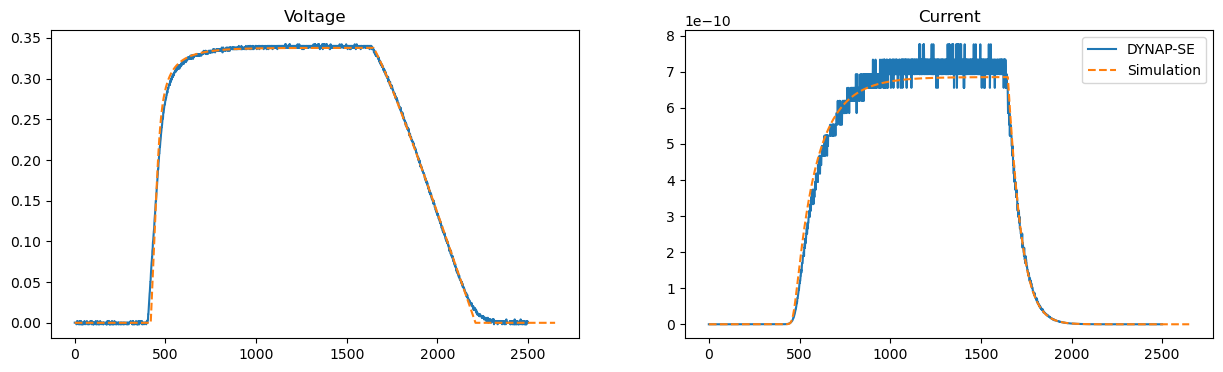

In [9]:
import matplotlib.pyplot as plt

neuron = DPIneuron(1, 1, Idc=0, Itau_mem=4.9e-12, Igain_mem=50e-12, Iampa_w0=1000e-12, alpha=1.06e9, dt=dt)
torch.nn.init.constant_(neuron.W_ampa.data, 1.0)
loss = 0
totalI = []
totalV = []
totalAmpa = []
neuron.reset()
for t in range(420):
    out = neuron(torch.zeros(1, 1))
    totalI.append(neuron.getImem()[0,:].detach().numpy())
    totalV.append(neuron.getVmem()[0,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())

neuron.Idc.data = torch.tensor(47e-12)
for t in range(1230):
    out = neuron(torch.zeros(1, 1))
    totalI.append(neuron.getImem()[0,:].detach().numpy())
    totalV.append(neuron.getVmem()[0,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())

neuron.Idc.data = torch.tensor(0)
for t in range(1000):
    out = neuron(torch.zeros(1, 1))
    totalI.append(neuron.getImem()[0,:].detach().numpy())
    totalV.append(neuron.getVmem()[0,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axs[0].plot(data, label='DYNAP-SE')
axs[0].plot(totalV, '--', label='Simulation')
axs[0].set_title('Voltage')

axs[1].plot(V2I(data), label='DYNAP-SE')
axs[1].plot(totalI, '--', label='Simulation')
axs[1].set_title('Current')

plt.legend()
plt.show()

In [10]:
import os
import fnmatch
import pandas as pd
# for i in range(len(fnmatch.filter(os.listdir('taucalib'), '*.*'))):
df = pd.read_csv(f'trainingRecord/TEK0003.CSV', header=None)
dt = float(df[1][1])
N = int(float(df[1][0]))
data = df[4].to_numpy() - df[4].to_numpy()[:10].mean()

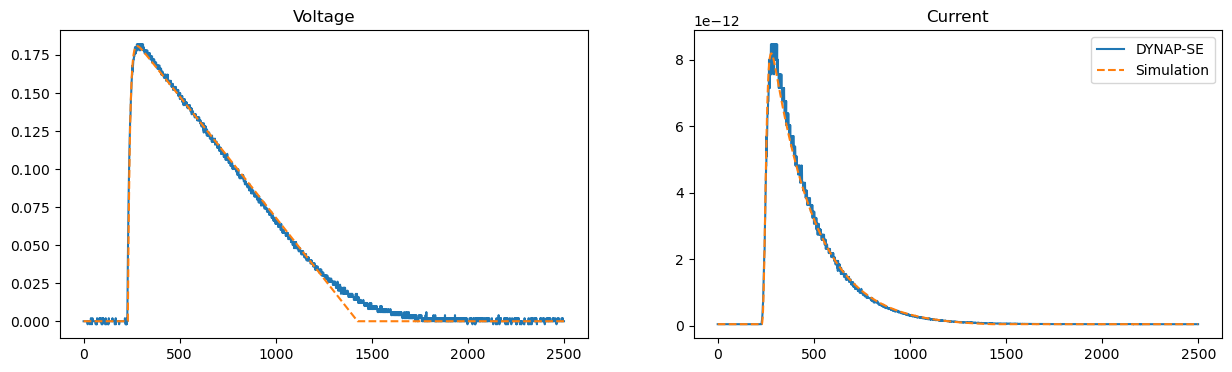

In [11]:
import matplotlib.pyplot as plt

neuron = DPIneuron(1, 1, Idc=0, Itau_mem=4.9e-12, Igain_mem=50e-12, alpha=1.06e9, Iampa_g=70e-12, Iampa_tau=70e-12, Iampa_w0=64000e-12, dt=dt)
torch.nn.init.constant_(neuron.W_ampa.data, 1.0)
loss = 0
totalI = []
totalV = []
totalAmpa = []
neuron.reset()
for t in range(2500):
    if t==230:
        out = neuron(torch.ones(1, 1))
    else:
        out = neuron(torch.zeros(1, 1))
    totalI.append(neuron.getImem()[0,:].detach().numpy())
    totalV.append(neuron.getVmem()[0,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axs[0].plot(data, label='DYNAP-SE')
axs[0].plot(totalV, '--', label='Simulation')
axs[0].set_title('Voltage')

axs[1].plot(V2I(data), label='DYNAP-SE')
axs[1].plot(totalI, '--', label='Simulation')
axs[1].set_title('Current')

plt.legend()
plt.show()

## Train the network

In [56]:
time = 500

input_size = 50
hidden_size = 50
connection_prob = 0.5

positive_freq = 100
negative_freq = 0

# input_random_shuffle = np.argsort(np.random.rand(input_size))
input_random_shuffle = np.arange(input_size)

output = []
total_input = []

active_label = 1.0 # 30Hz when active
inactive_label = 0 # 5 Hz when inactive

def generateInput():
    total_input=[]
    total_label=[]

    # input_1 = (torch.rand(1, time, input_size) < torch.cat((torch.tensor([positive_freq]).repeat(1, time, input_size//2), torch.tensor([negative_freq]).repeat(1, time, input_size//2)), dim=2)*1e-3).float()
    # input_2 = (torch.rand(1, time, input_size) < torch.cat((torch.tensor([negative_freq]).repeat(1, time, input_size//2), torch.tensor([positive_freq]).repeat(1, time, input_size//2)), dim=2)*1e-3).float()
    # input = torch.cat([input_1, input_2], dim=1)
    # input = input[:,:,input_random_shuffle]
    # label = torch.tensor([[inactive_label, inactive_label]])
    # total_input.append(input)
    # total_label.append(label)

    input = (torch.rand(1, time, input_size) < torch.cat((torch.tensor([positive_freq]).repeat(1, time, input_size//2), torch.tensor([negative_freq]).repeat(1, time, input_size//2)), dim=2)*1e-3).float()
    input = input[:,:,input_random_shuffle]
    label = torch.cat((torch.tensor([active_label]).repeat(1, time, input_size//2), torch.tensor([inactive_label]).repeat(1, time, input_size//2)), dim=2)
    total_input.append(input)
    total_label.append(label)

    input = (torch.rand(1, time, input_size) < torch.cat((torch.tensor([negative_freq]).repeat(1, time, input_size//2), torch.tensor([positive_freq]).repeat(1, time, input_size//2)), dim=2)*1e-3).float()
    input = input[:,:,input_random_shuffle]
    # label = torch.tensor([[inactive_label, active_label]])
    label = torch.cat((torch.tensor([inactive_label]).repeat(1, time, input_size//2), torch.tensor([active_label]).repeat(1, time, input_size//2)), dim=2)
    total_input.append(input)
    total_label.append(label)

    total_input = torch.cat(total_input, dim=0).transpose(0,1)
    total_label = torch.cat(total_label, dim=0).transpose(0,1)
    return total_input, total_label
dataX,datay = generateInput()

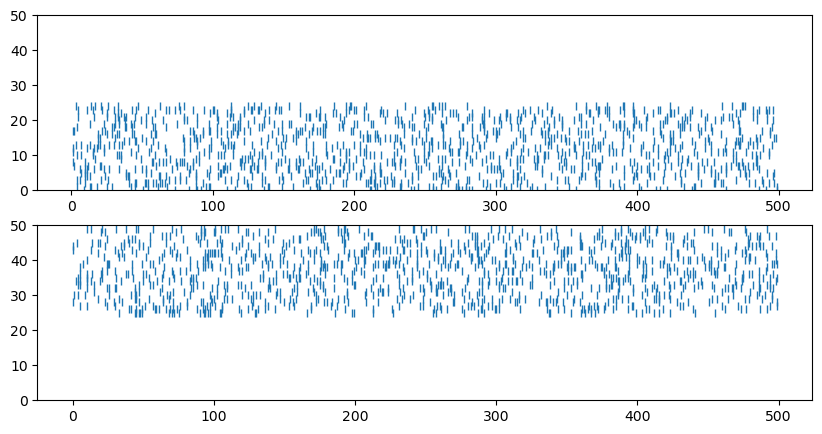

In [57]:
fig, axs = plt.subplots(2, 1, figsize=(10,5))
x,y = np.where(dataX[:,0])
axs[0].plot(x,y,'|')
axs[0].set_ylim([0, 50])

x,y = np.where(dataX[:,1])
axs[1].plot(x,y,'|')
axs[1].set_ylim([0, 50])

# x,y = np.where(dataX[:,2])
# axs[2].plot(x,y,'|')
plt.show()

In [58]:
from tqdm import tqdm

neuron = DPIneuron(input_size, hidden_size, Idc=0, Itau_mem=4.55e-12, Igain_mem=50e-12, alpha=1.06e9, Iampa_g=70e-12, Iampa_tau=60e-12, Iampa_w0=6400e-12, dt=dt)
torch.nn.init.normal_(neuron.W_ampa.data, 1)
with torch.no_grad():
        neuron.W_ampa.data.clamp_min_(0.0)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(neuron.parameters(), lr=1e-3)
pbar = tqdm(range(1))
for epoch in pbar:
    loss = 0
    totalS = []
    totalI = []
    totalV = []
    totalAmpa = []
    neuron.reset()
    
    inputs,target = generateInput()
    out = 0
    for t in range(inputs.shape[0]):
        s = neuron(inputs[t])
        out+=s
        totalS.append(s)
        totalI.append(neuron.getImem()[0,:].detach().numpy())
        totalV.append(neuron.getVmem()[0,:].detach().numpy())
        totalAmpa.append(neuron.getIampa()[0,:].detach().numpy())
    totalS = torch.stack(totalS)
    loss += loss_fn(totalS, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    pbar.set_postfix_str(loss.item())

    with torch.no_grad():
        neuron.W_ampa.data.clamp_min_(0.0)
        neuron.W_ampa.data = torch.clamp_max(neuron.W_ampa.data.sum(dim=1), 40)*neuron.W_ampa.data / (neuron.W_ampa.data.sum(dim=1)[:,None]+1e-14)
        # neuron.W_ampa.data = 40*neuron.W_ampa.data / neuron.W_ampa.data.sum(dim=1)
        # neuron.W_ampa.data = torch.round(neuron.W_ampa.data)

100%|██████████| 1/1 [00:00<00:00,  2.75it/s, 0.49998000264167786]


In [45]:
target.shape

torch.Size([200, 2, 25])

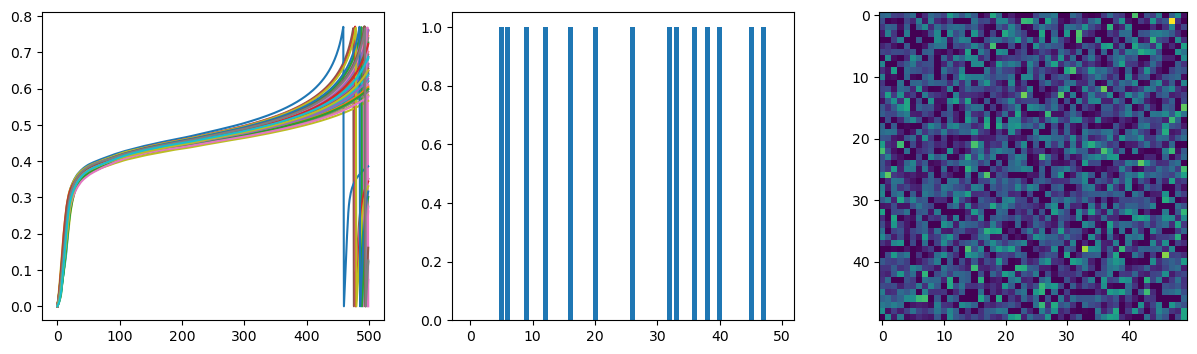

In [60]:
out = 0
totalI = []
totalV = []
totalAmpa = []
neuron.reset()
inputs,target = generateInput()
for t in range(inputs.shape[0]):
    out += neuron(inputs[t])
    totalI.append(neuron.getImem()[1,:].detach().numpy())
    totalV.append(neuron.getVmem()[1,:].detach().numpy())
    totalAmpa.append(neuron.getIampa()[1,:].detach().numpy())
    
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].plot(totalV)
axs[1].bar(x=np.arange(50), height=out.detach().numpy()[1])
axs[2].imshow(neuron.W_ampa.detach())
plt.show()

In [59]:
neuron.W_ampa.grad

tensor([[-8.3326e-12, -7.7345e-12, -7.0824e-12,  ...,  2.2619e-14,
          3.1478e-14,  3.0476e-14],
        [-9.7926e-12, -9.7324e-12, -8.4027e-12,  ...,  2.1810e-14,
          3.2573e-14,  2.8908e-14],
        [-7.8372e-12, -7.1868e-12, -6.5649e-12,  ...,  2.3447e-14,
          3.0661e-14,  2.9233e-14],
        ...,
        [ 2.5764e-14,  3.4167e-14,  2.2439e-14,  ..., -6.7030e-12,
         -8.5760e-12, -5.1951e-12],
        [ 2.4487e-14,  3.2267e-14,  2.2324e-14,  ..., -7.1877e-12,
         -9.1659e-12, -5.7481e-12],
        [ 2.4659e-14,  3.2961e-14,  2.2350e-14,  ..., -7.0302e-12,
         -8.9867e-12, -5.5594e-12]])

In [17]:
for p in neuron.parameters():
    print(torch.round(p))

tensor([[0., 0., 2.,  ..., 0., 1., 1.],
        [0., 1., 1.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 2., 0.],
        ...,
        [0., 2., 0.,  ..., 1., 1., 1.],
        [0., 0., 2.,  ..., 1., 1., 0.],
        [0., 0., 1.,  ..., 0., 0., 1.]], grad_fn=<RoundBackward0>)
